# 1 - Introduction
---

## 1.1 Identity

Nama : Husain Tsabit Abdur Rahim

Batch : FTDS H8 016 RMT

## 1.2 Problem Statement and Objective

Problem Statement : 

Membuat model clustering untuk melakukan Customer Segmentation dari data kartu kredit sebuah bank berdasarkan informasi penggunaan selama 6 bulan terakhir.

Objectictive : 

## 1.3 SQL Queries

`` select * from `ftds-hacktiv8-project.phase1_ftds_016_rmt.credit-card-information` where mod(CUST_ID,2) = 0 ``

## 1.4 About the Dataset

  <img src='https://i.ibb.co/2sbf0Js/P1-G4-Dataset-Information.png'>

# 2 - Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#splitting data
from sklearn.model_selection import train_test_split

# handling outliers
from feature_engine.outliers import Winsorizer

# feature scalling
from sklearn.preprocessing import MinMaxScaler

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

# 3 - Load Dataset

## 3.1 Import Dataset

In [2]:
# Load dataset
df = pd.read_csv('/Users/husaintsabit/Downloads/h8dsft_P1G4_husain_tsabit.csv')
df.head() #showing the first 5 rows of df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125,200.0,0.0,200.0,0.0,0.125,0.000,0.125,0.0,0,2,1200.0,0.000000,NaN,0.0,8
1,1902,943.584041,0.875,103.0,103.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,215.325023,410.484825,0.0,8
2,2322,1.979916,0.125,80.0,80.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,0.000000,NaN,0.0,8
3,3426,461.455720,1.000,585.0,585.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1000.0,258.032630,151.696433,0.0,8
4,3976,1053.594730,1.000,1450.0,1450.0,0.0,0.0,0.125,0.125,0.000,0.0,0,1,1500.0,397.090516,227.143184,0.0,8


In [3]:
# showing the last 5 rows of dataset
df.tail() 

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11
4474,3564,1977.007090,1.000000,1032.04,226.90,805.14,4335.919227,0.909091,0.090909,0.818182,0.545455,21,17,4000.0,3056.424974,910.707525,0.090909,11


In [4]:
# Duplicate Dataset

df_copy = df.copy()

statement : Duplicate untuk antisipasi jika dibutuhkan data original.

## 3.2 Data Overview

In [5]:
# Overview of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

statement : Dataset terdiri dari 4475 rows dan 18 columns. Terdapat beberapa column yang memiliki missing values seperti pada column `CREDIT_LIMIT` dan `MINIMUM_PAYMENTS`, semua tipe datanya numerik.

In [6]:
df.describe()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4475.000000,4474.000000,4475.000000,4317.000000,4475.000000,4475.000000
mean,4476.000000,1565.743939,0.877608,1003.158324,588.504849,415.025075,973.453671,0.490122,0.202614,0.364989,0.134156,3.196425,14.490503,4494.020175,1726.212274,854.429538,0.157206,11.516425
std,2583.931114,2091.205727,0.235604,2210.812899,1666.500287,927.360842,2133.464502,0.399874,0.298502,0.397336,0.199221,6.500169,24.156038,3668.535689,2961.258570,2306.411178,0.295869,1.347819
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,0.037744,0.000000,6.000000
25%,2239.000000,132.536353,0.888889,40.065000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1500.000000,390.206371,169.814310,0.000000,12.000000
50%,4476.000000,874.905296,1.000000,362.480000,29.990000,89.450000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,831.048408,309.854995,0.000000,12.000000
75%,6713.000000,2058.519163,1.000000,1122.640000,580.320000,484.255000,1098.569962,0.916667,0.333333,0.750000,0.181818,4.000000,17.000000,6000.000000,1895.959003,830.395060,0.166667,12.000000
max,8950.000000,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,29282.109150,1.000000,1.000000,1.000000,1.166667,110.000000,358.000000,30000.000000,46930.598240,61031.618600,1.000000,12.000000


statement : 

1. Balance merupakan saldo yang dimiliki oleh para users, yang mana rata-rata saldo dari 4475 user mempunyai saldo $1565 dengan saldo tertinggi $19043.
2. Balance frequency disini berisikan frekuensi user topup saldo pada akun mereka. disini untuk rata-ratanya yaitu  0.877.
3. Purchase atau pembelian yang dilakukan rata-rata dari seluruh user ada 1.003 kali, dengan pembelian paling banyak yaitu sebanyak 49.039 kali. 
4. Oneoff purchase, Jumlah (dollar) dalam sekali pembelian, pembelian tertinggi dalam sekali pembelian yaitu $40761
5. Installment purchase merupakan pembelian yang dilakuakan dengan metode cicilan, rata-rata user yang menggunakan credit card untuk belanja yaitu $415.
6. cash_advance merupakan pembayaran cash oleh user kepada bank, rata-rata pembayaran ada di angka $ 973,45, pembayaran ini lebih besar dibandingkan dengn rata-rata pinjamannya

# 4 - Exploratory Data Analysis

## 4.1 Check Data Distribution

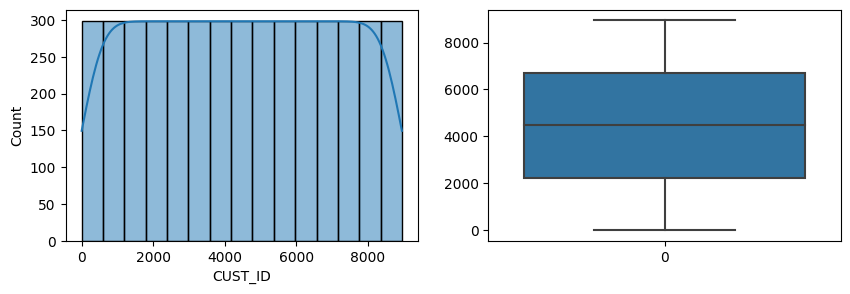

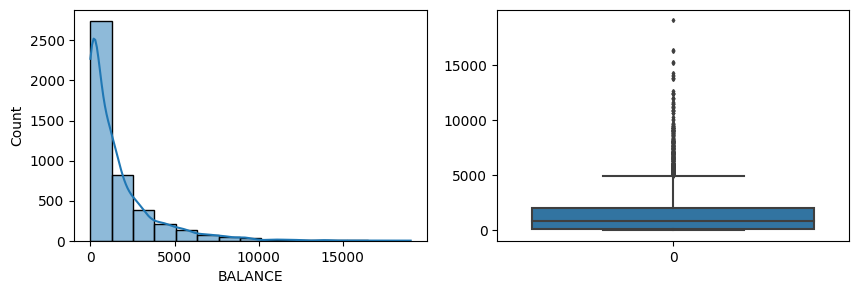

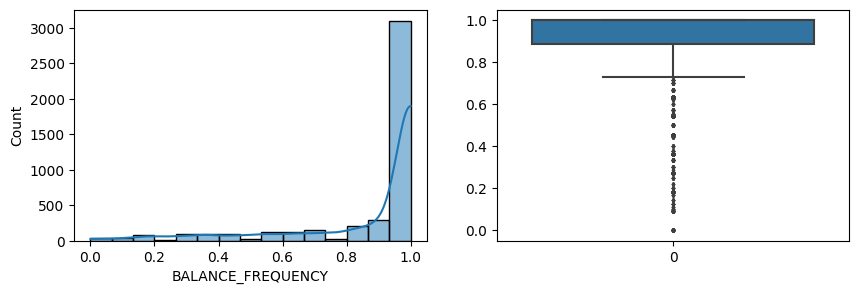

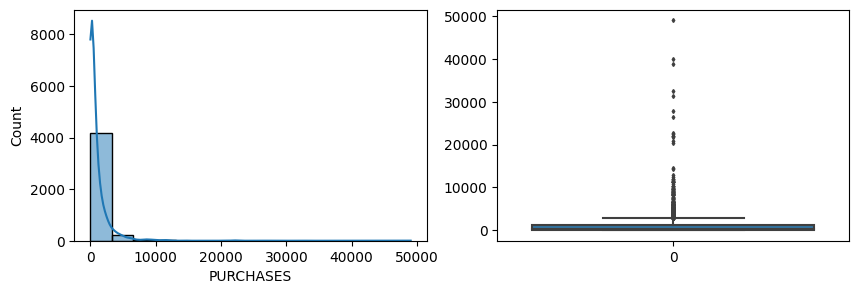

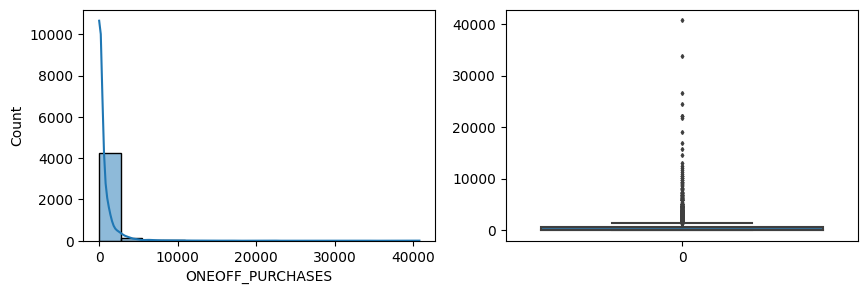

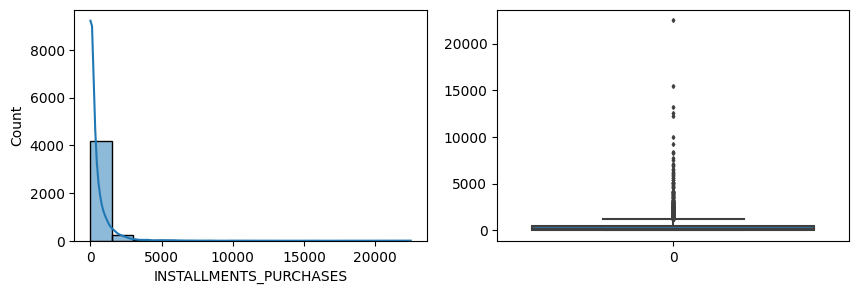

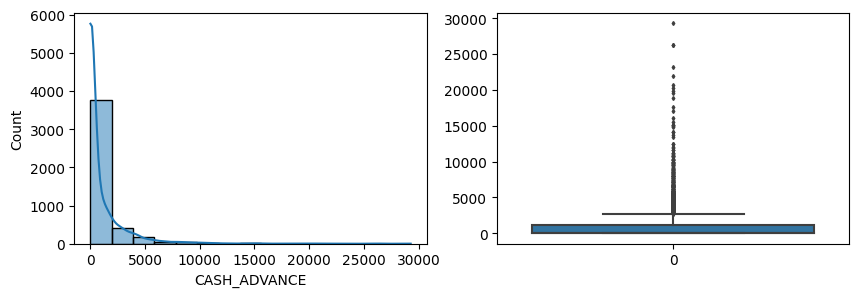

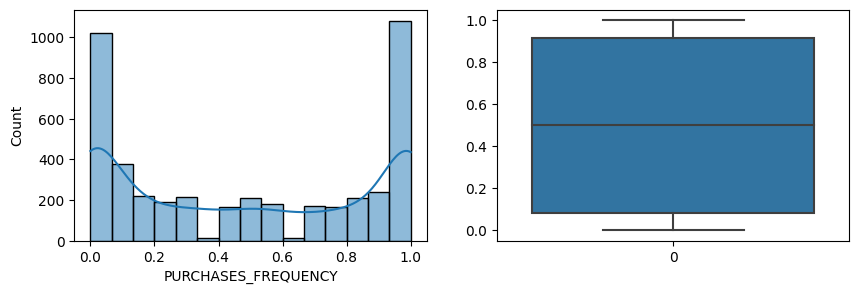

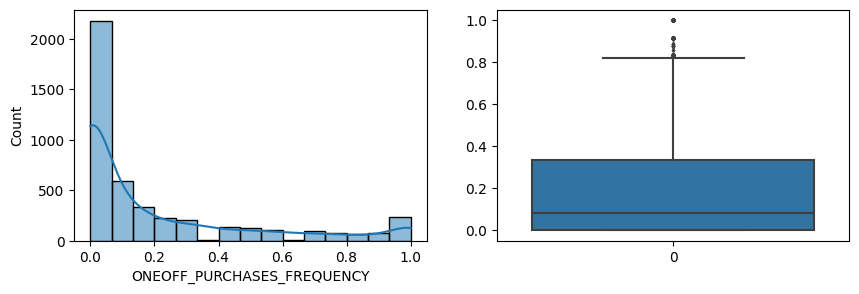

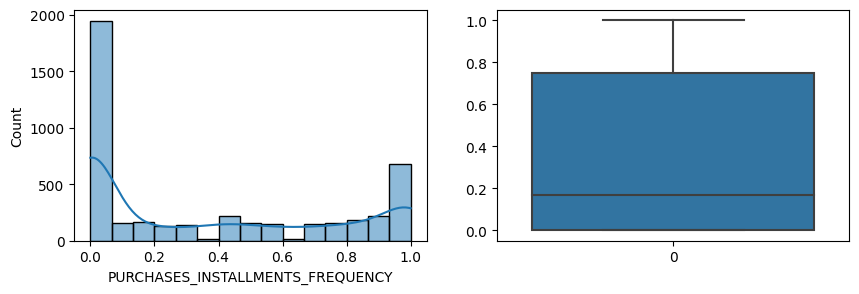

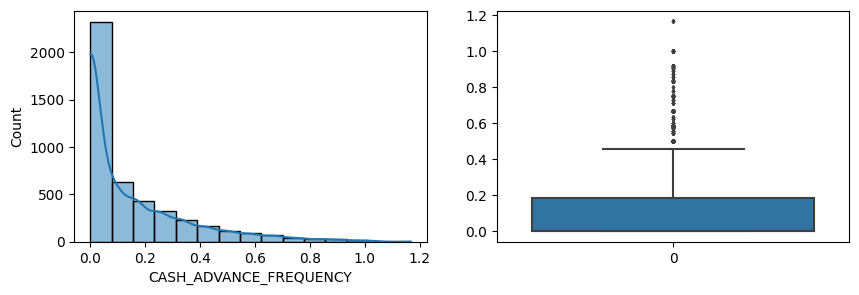

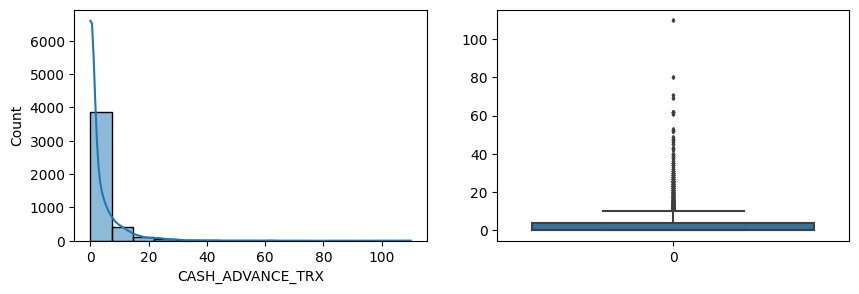

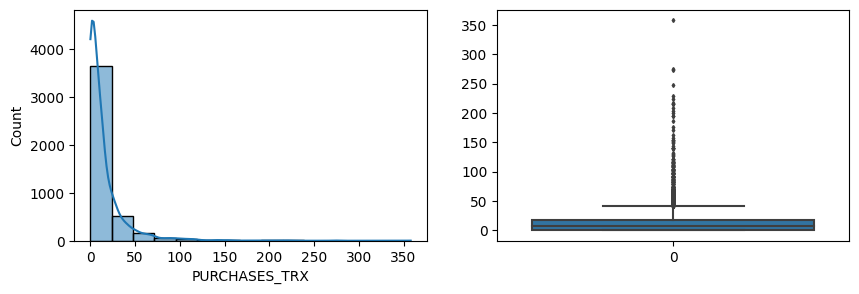

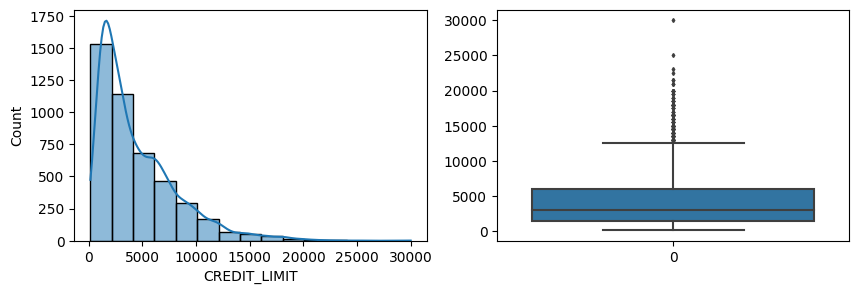

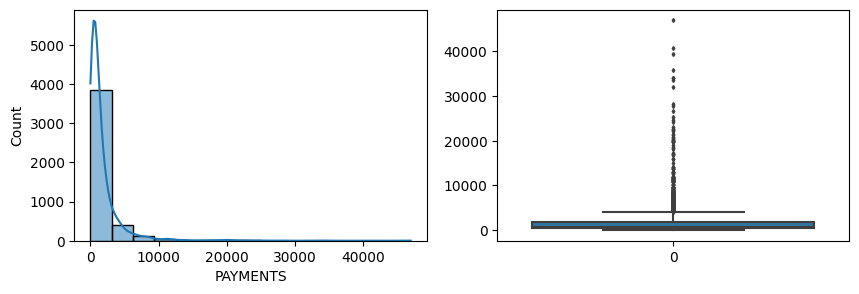

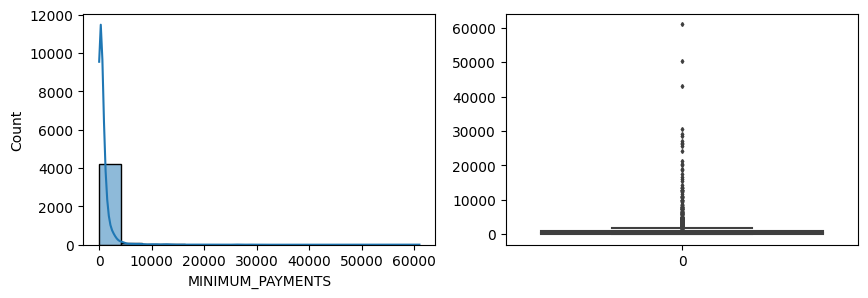

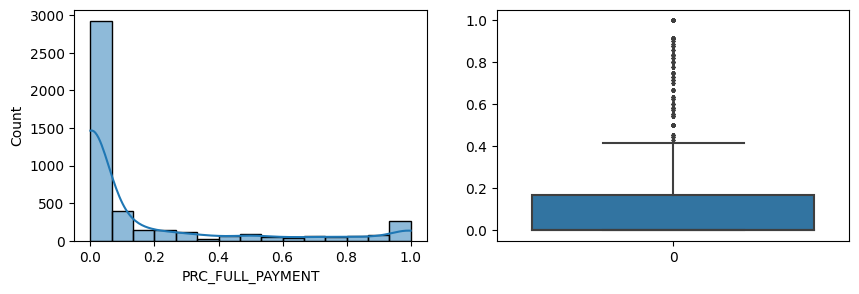

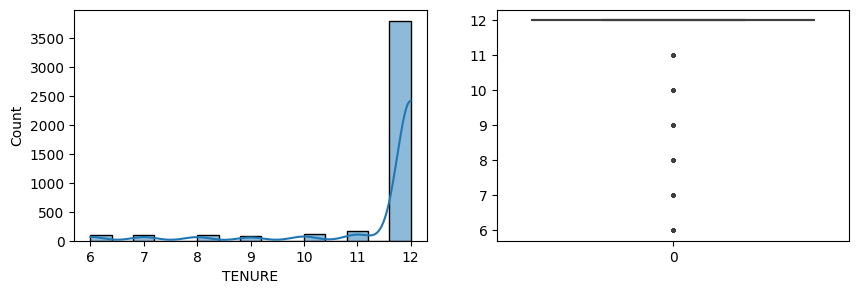

In [7]:
# Create distibution plot for analysis

num_col = [feature for feature in df.columns if df[feature].dtypes!='object']

for i in num_col:
   
    fig, axs = plt.subplots(1,2,figsize=(10, 3))

    sns.histplot(df[i],bins=15, kde=True,ax=axs[0])
    sns.boxplot(df[i], ax = axs[1], fliersize=2)

statement : dapat dilihat bahwa mayoritas data berdistribusi skewed.

## 4.2 Correlation Between Collumns

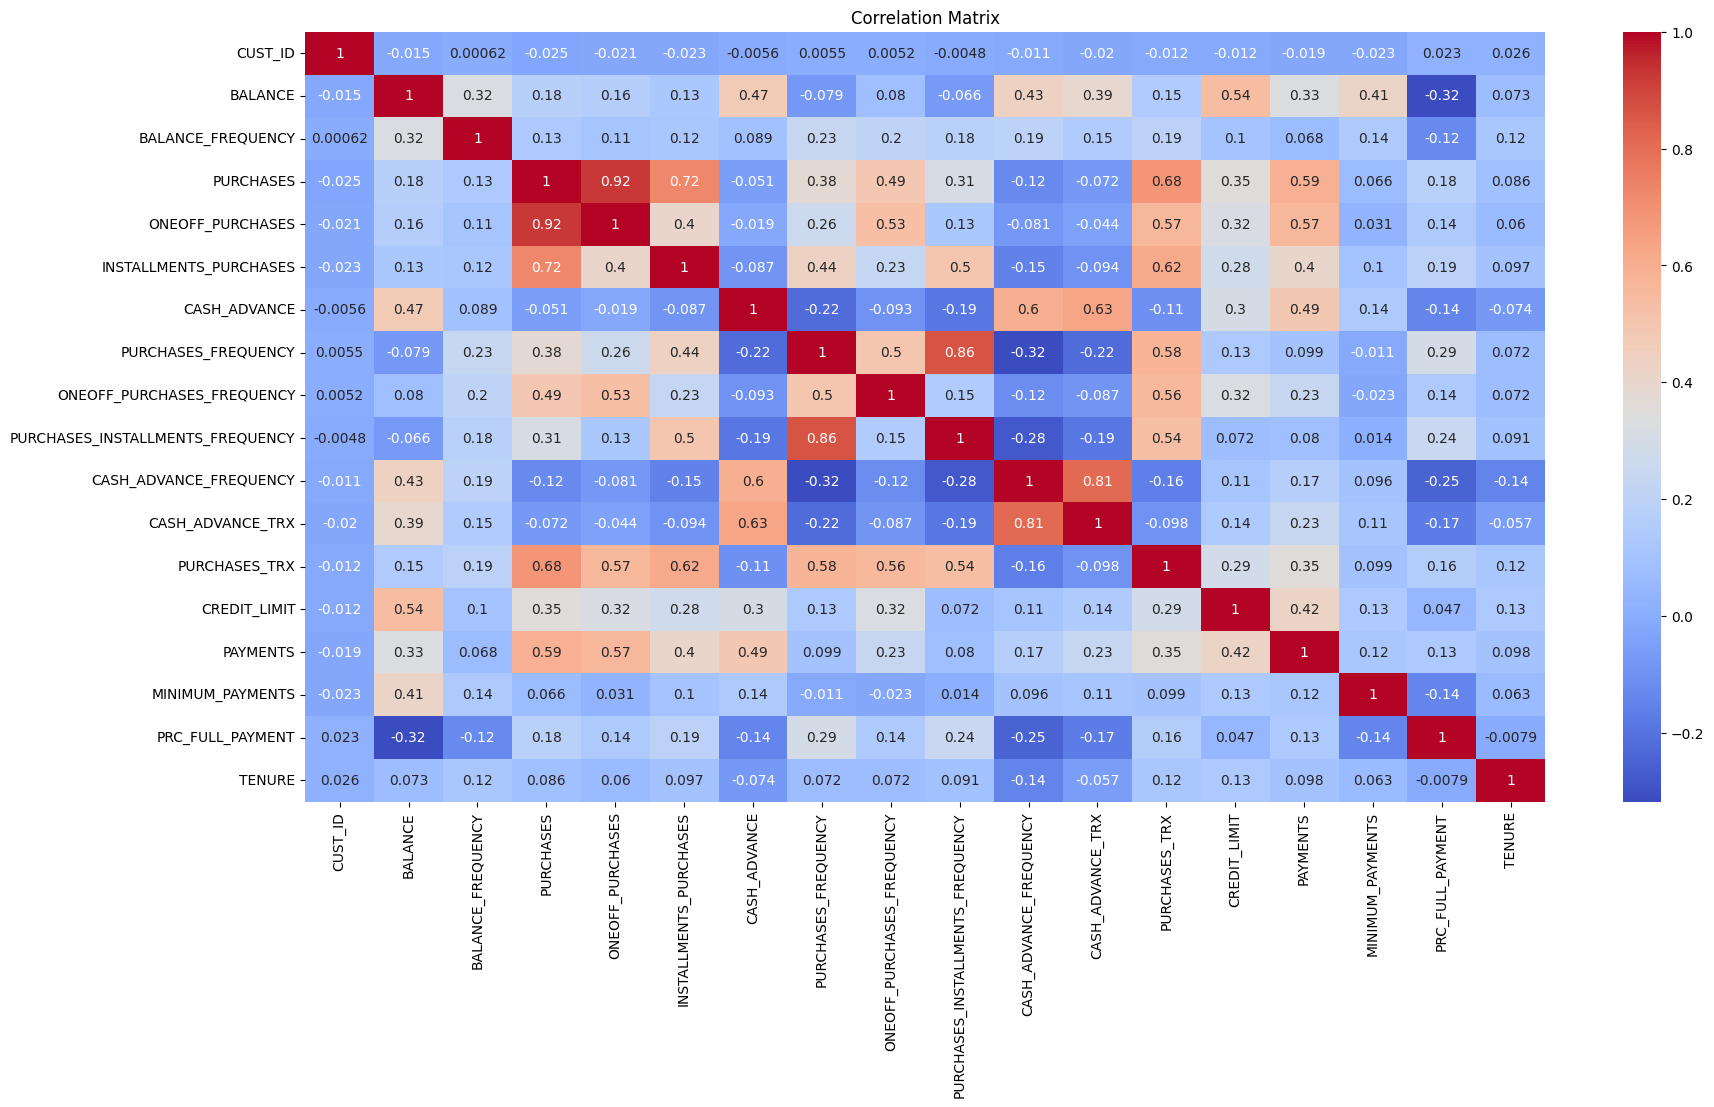

In [8]:
# create plot correlation

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

statement : 

Kita bisa melihat korelasi antar kolom pada dataset ini, berikut merupakan beberapa kolom yang memiliki korelasi yang tinggi (> 0.50) :

- balance dengan (credit limit),
- purchase dengan (payments, purchase_trx, installments_purchase, oneoff_purchase)
- oneoff purchases (payment, purchase trx, purchase trx)
- installments purchase ( purchase trx, purchases)
- cash advance (cash advance frequency, cash advance trx)
- purchases frequency (purchases installment frequency)
- oneoff purchase frequency (purchase trx, oneoff purchases)
- purchase installments frquency ( purchase trx)
- cash advance frequency(cash advance, cash advance trx)
- cash advance trx (cash advance frequency, cash advance)

## 4.3 Credit Limit Scatter Plot

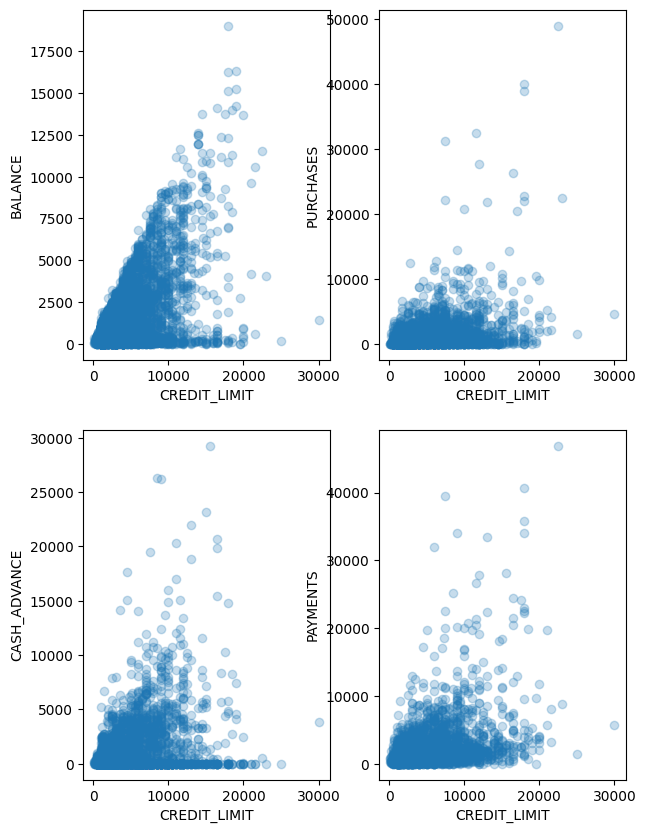

In [9]:
# Create scatter plot for analysis

plt.figure(figsize=(7,10))
columns = ['BALANCE', 'PURCHASES','CASH_ADVANCE', 'PAYMENTS']
n = 1
for x in columns:
    plt.subplot(2, 2, n)
    plt.scatter(df['CREDIT_LIMIT'], df[x], alpha=0.25)
    plt.xlabel('CREDIT_LIMIT')
    plt.ylabel(x)
    n=n+1

plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

analysis statement :

1. Balance atau saldo yang ada secara garis besar menggambarkan kondisi finansial customer, oleh karena itu jika semakin tinggi saldo yang dimiliki maka pihak kartu kredit akan memberikan limit kredit yang tinggi juga. Tetapi tidak 100% credit limit ini dipengaruhi oleh saldo karena pada scatter plot diatas masih ada cutomer yang memiliki saldo rendah tetapi memiliki limit kredit yang tinggi.

2. Purchase menggambarkan jumlah pembelanjaan dari setiap akun, kebanyakan para customer masih melakukan pembelanjaan sesuai dengan kemampuan kapasitas kartu kreditnya, mayoritas customer berbelanja kurang dari 10.000, akan tetapi ada beberapa customer yang melakukan pembelanjaan melebihi kapasitasnya.

3. Cash advance atau sejumlah cash yang dipegang oleh customer, para customer jarang yang melakukan penarikan hingga batas atas dari limitnya, walaupun terdapat beberapa user yang melakukan penarikan uang tunai hampir sejumlah dengan limit yang dimilikinya, namun kebanyakan dari mereka masih dibawah atau sesuai dengan limit yang dimilikinya.

4. Payment atau jumlah pembayaran yang sudah dilakukan customer kebanyakan masih sesuai dengan kapasitas limit dari kartu kredit itu sendiri, namun terdapat beberapa customer yang jumlah pembayarannya sudah melebihi batas dari limit kartu kredit yang diberikan.

# 5 - Data Preprocessing

## 5.1 Get Model Inference from Dataset

In [10]:
# getting 20 data for model inference
df_inf = df.sample(20, random_state=22) 

df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
1025,7092,312.636004,1.000000,3866.29,808.12,3058.17,0.000000,1.000000,1.000000,1.000000,0.000000,0,95,7500.0,3688.890803,190.886140,0.750000,12
3191,112,360.671491,1.000000,3956.64,0.00,3956.64,148.682192,1.000000,0.000000,1.000000,0.083333,1,12,4500.0,4013.483114,3662.236048,0.250000,12
1666,846,30.692503,0.454545,205.06,0.00,607.76,0.000000,0.916667,0.000000,1.000000,0.000000,0,35,4500.0,163.982192,55.660981,0.000000,12
1898,8312,2817.590920,1.000000,37.92,0.00,37.92,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,3000.0,755.313452,1167.316335,0.000000,12
3574,4176,7803.071972,1.000000,1000.55,0.00,1000.55,1490.239239,1.000000,0.000000,1.000000,0.333333,6,35,8000.0,3478.320794,2722.218432,0.000000,12
1487,4466,64.907748,0.727273,547.28,130.00,417.28,0.000000,0.333333,0.083333,0.250000,0.000000,0,4,2500.0,1095.179494,126.509061,1.000000,12
4294,3568,1362.418281,1.000000,1477.44,900.00,577.44,451.968387,1.000000,0.111111,0.888889,0.111111,1,10,1500.0,559.095981,1058.844790,0.000000,9
2121,5736,284.433780,0.363636,212.92,0.00,212.92,0.000000,0.833333,0.000000,0.833333,0.000000,0,15,1500.0,1202.791804,150.107024,0.000000,12
3448,404,8040.732429,1.000000,0.00,0.00,0.00,3500.334072,0.000000,0.000000,0.000000,0.333333,21,0,12000.0,2709.478892,2044.554634,0.000000,12
2332,3912,772.647723,0.875000,0.00,0.00,0.00,970.371120,0.000000,0.000000,0.000000,0.125000,1,0,2500.0,125.862157,209.002905,0.000000,8


In [11]:
# drop data inference from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,788,16.581535,0.125000,200.00,0.00,200.00,0.000000,0.125000,0.000000,0.125000,0.000000,0,2,1200.0,0.000000,NaN,0.000000,8
1,1902,943.584041,0.875000,103.00,103.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,215.325023,410.484825,0.000000,8
2,2322,1.979916,0.125000,80.00,80.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,0.000000,NaN,0.000000,8
3,3426,461.455720,1.000000,585.00,585.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1000.0,258.032630,151.696433,0.000000,8
4,3976,1053.594730,1.000000,1450.00,1450.00,0.00,0.000000,0.125000,0.125000,0.000000,0.000000,0,1,1500.0,397.090516,227.143184,0.000000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4470,4630,1079.008102,1.000000,0.00,0.00,0.00,1259.571764,0.000000,0.000000,0.000000,0.545455,9,0,1200.0,1379.635287,271.364415,0.090909,11
4471,8614,809.582978,0.909091,0.00,0.00,0.00,3819.672466,0.000000,0.000000,0.000000,0.545455,7,0,4150.0,4372.148648,241.645387,0.090909,11
4472,4296,3386.490883,1.000000,560.98,427.22,133.76,2008.153534,1.000000,0.727273,0.363636,0.545455,9,20,10100.0,1039.000037,886.050237,0.000000,11
4473,4476,4840.545574,1.000000,1595.93,1595.93,0.00,4359.325750,0.454545,0.454545,0.000000,0.545455,17,25,6000.0,905.844846,2376.919568,0.090909,11


In [12]:
# reset indexing

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,7092,312.636004,1.000000,3866.29,808.12,3058.17,0.000000,1.000000,1.000000,1.000000,0.000000,0,95,7500.0,3688.890803,190.886140,0.750000,12
1,112,360.671491,1.000000,3956.64,0.00,3956.64,148.682192,1.000000,0.000000,1.000000,0.083333,1,12,4500.0,4013.483114,3662.236048,0.250000,12
2,846,30.692503,0.454545,205.06,0.00,607.76,0.000000,0.916667,0.000000,1.000000,0.000000,0,35,4500.0,163.982192,55.660981,0.000000,12
3,8312,2817.590920,1.000000,37.92,0.00,37.92,0.000000,0.166667,0.000000,0.166667,0.000000,0,2,3000.0,755.313452,1167.316335,0.000000,12
4,4176,7803.071972,1.000000,1000.55,0.00,1000.55,1490.239239,1.000000,0.000000,1.000000,0.333333,6,35,8000.0,3478.320794,2722.218432,0.000000,12
5,4466,64.907748,0.727273,547.28,130.00,417.28,0.000000,0.333333,0.083333,0.250000,0.000000,0,4,2500.0,1095.179494,126.509061,1.000000,12
6,3568,1362.418281,1.000000,1477.44,900.00,577.44,451.968387,1.000000,0.111111,0.888889,0.111111,1,10,1500.0,559.095981,1058.844790,0.000000,9
7,5736,284.433780,0.363636,212.92,0.00,212.92,0.000000,0.833333,0.000000,0.833333,0.000000,0,15,1500.0,1202.791804,150.107024,0.000000,12
8,404,8040.732429,1.000000,0.00,0.00,0.00,3500.334072,0.000000,0.000000,0.000000,0.333333,21,0,12000.0,2709.478892,2044.554634,0.000000,12
9,3912,772.647723,0.875000,0.00,0.00,0.00,970.371120,0.000000,0.000000,0.000000,0.125000,1,0,2500.0,125.862157,209.002905,0.000000,8


## 5.2 Handle Missing Values

In [13]:
# cek missing value
df.isnull().mean()


CUST_ID                             0.000000
BALANCE                             0.000000
BALANCE_FREQUENCY                   0.000000
PURCHASES                           0.000000
ONEOFF_PURCHASES                    0.000000
INSTALLMENTS_PURCHASES              0.000000
CASH_ADVANCE                        0.000000
PURCHASES_FREQUENCY                 0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
CASH_ADVANCE_FREQUENCY              0.000000
CASH_ADVANCE_TRX                    0.000000
PURCHASES_TRX                       0.000000
CREDIT_LIMIT                        0.000223
PAYMENTS                            0.000000
MINIMUM_PAYMENTS                    0.035307
PRC_FULL_PAYMENT                    0.000000
TENURE                              0.000000
dtype: float64

statement : karena pada column `CREDIT_LIMIT` terdapat missing values senilai 3.53% dan `MIMINUM_PAYMENT` 0.02% dari keseluruhan data, maka missing values akan di handle dengan melakukan imputation. Sebelum dilakukan imputation maka akan dilakukan pengecekan distribusi terlebih dahulu.

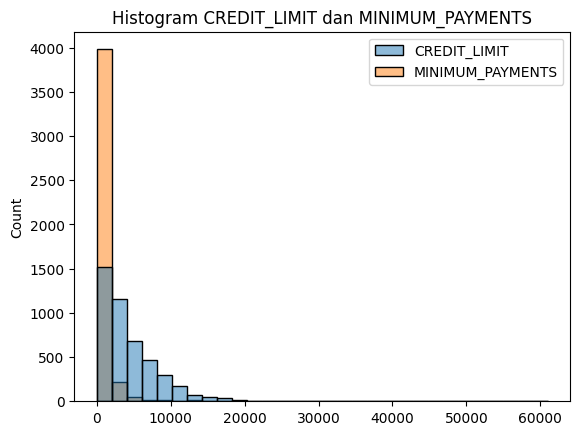

In [14]:
# jenis distribusi kolom
sns.histplot(df[['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']], bins=30)
plt.title('Histogram CREDIT_LIMIT dan MINIMUM_PAYMENTS')
plt.show()

Dapat dilihat bahwa pada kolom CREDIT_LIMIT dan MINIMUM_PAYMENTS distribusinya adalah right-skew, maka akan digunakan median imputation untuk mengganti missing value.

In [15]:
# replace missing value CREDIT_LIMIT dan MINIMUM_PAYMENTS
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

In [16]:
# cek kembali missing value
df['CREDIT_LIMIT'].isnull().mean()
df['MINIMUM_PAYMENTS'].isnull().mean()

0.0

## 5.3 Handle Outlier

In [17]:
# Membuat fungsi untuk membuat histogram dan boxplot bagi data
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

melihat distribusi data sebelum handling outlier

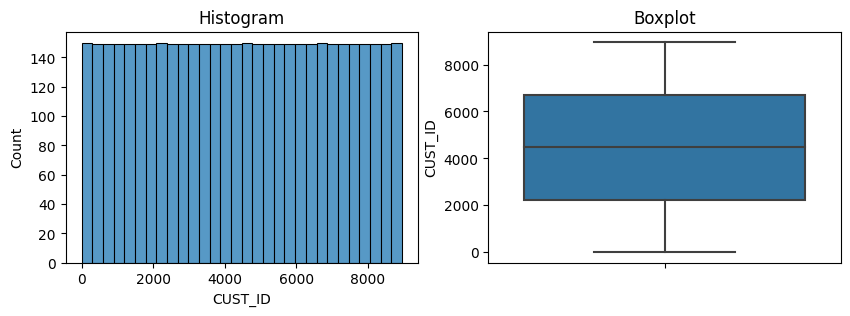

skewness: 0.0
the distribution is normal


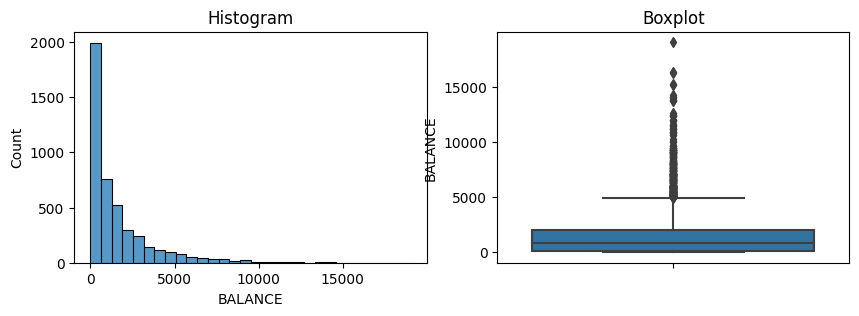

skewness: 2.456620962191608
the distribution is skewed


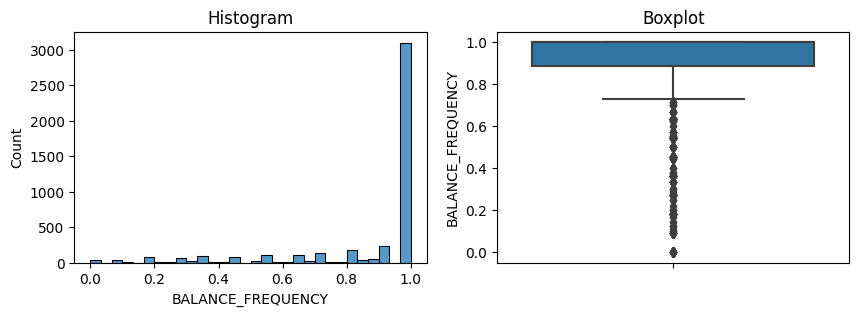

skewness: -2.020309250153954
the distribution is skewed


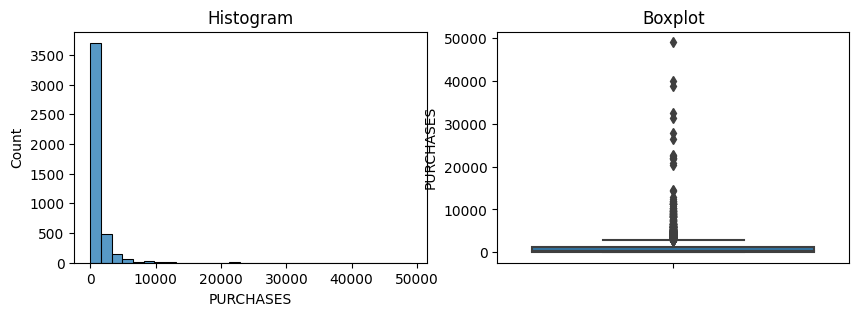

skewness: 8.987051591977552
the distribution is skewed


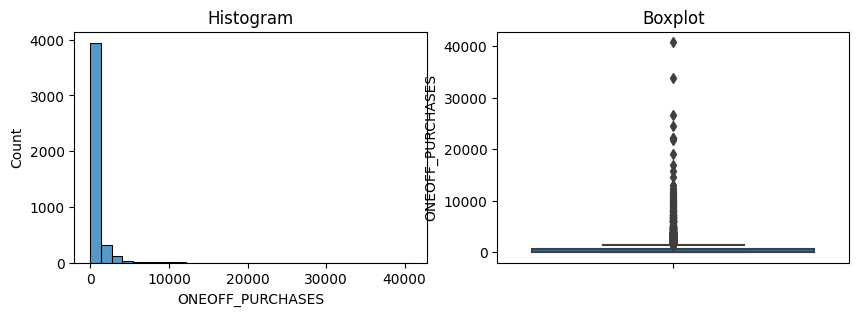

skewness: 10.140058770209015
the distribution is skewed


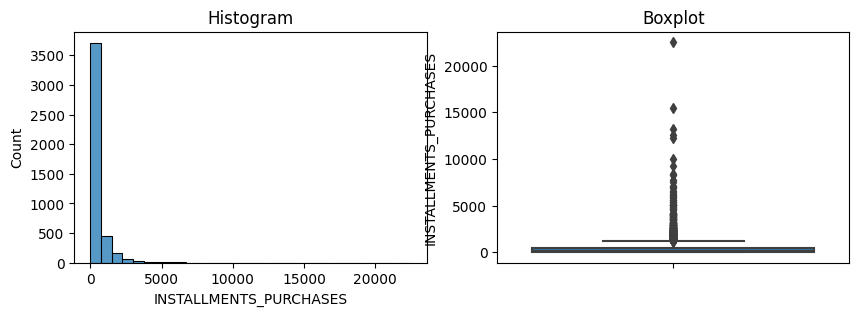

skewness: 8.116887369354234
the distribution is skewed


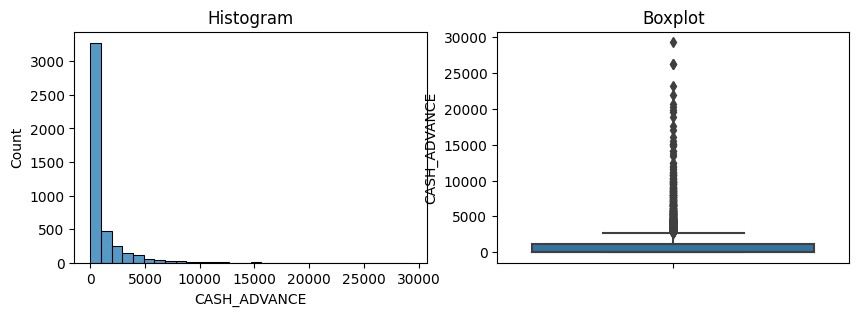

skewness: 4.739677538274201
the distribution is skewed


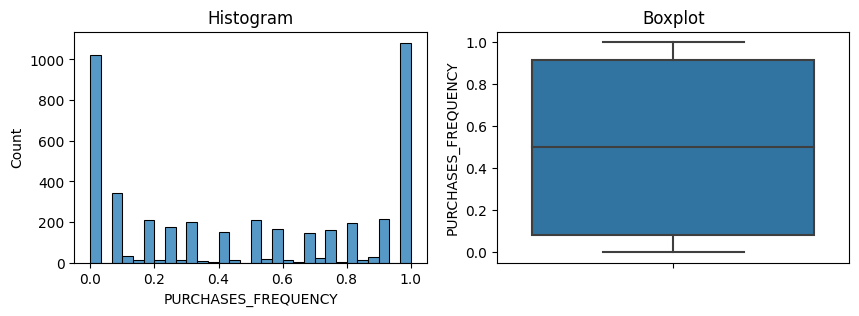

skewness: 0.06159754482450298
the distribution is normal


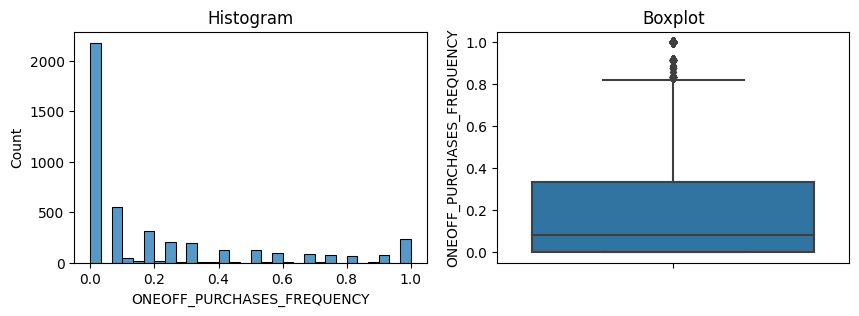

skewness: 1.5234554787719887
the distribution is skewed


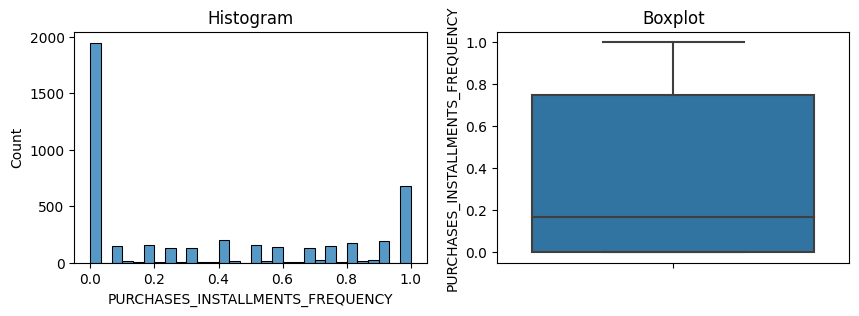

skewness: 0.5102876658863782
the distribution is skewed


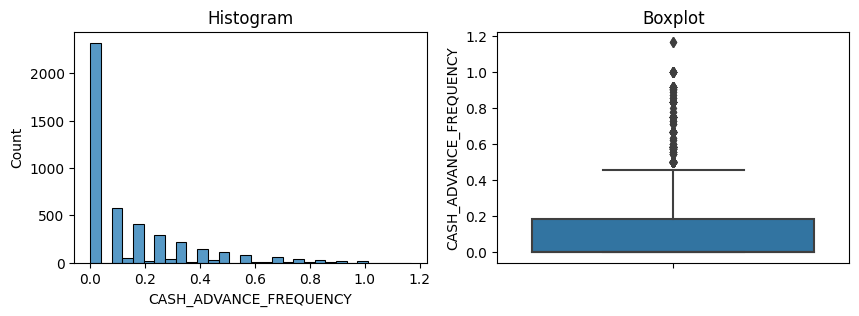

skewness: 1.8233800138256115
the distribution is skewed


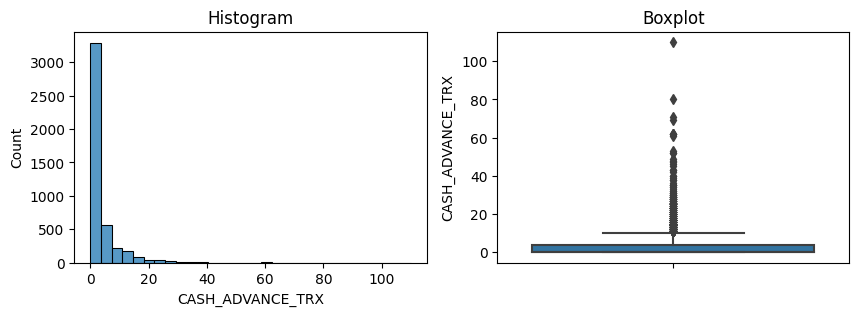

skewness: 4.75278000331602
the distribution is skewed


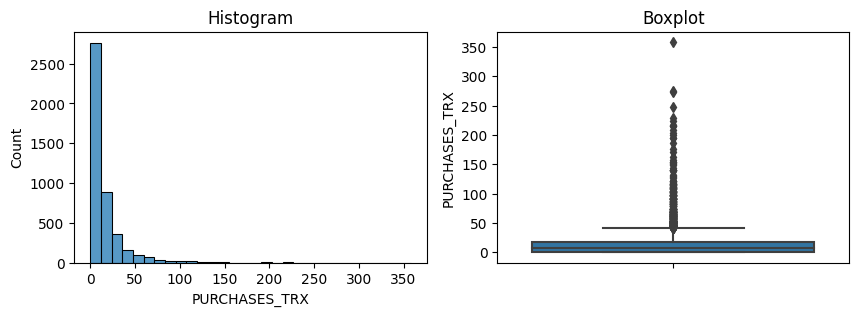

skewness: 4.480452469147952
the distribution is skewed


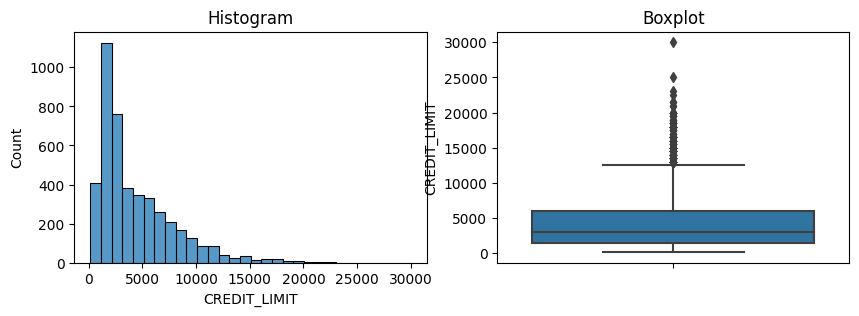

skewness: 1.545422651648898
the distribution is skewed


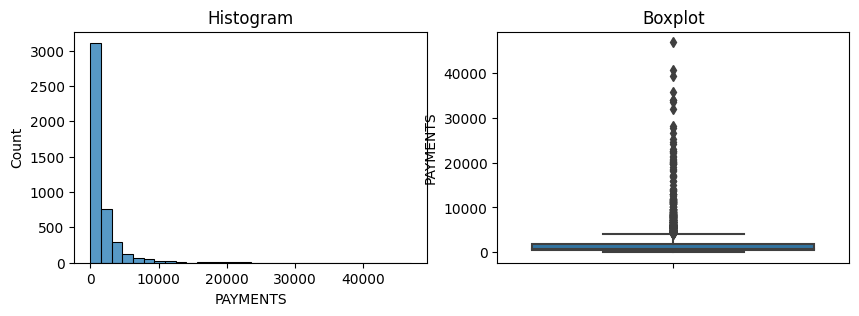

skewness: 6.040773400922328
the distribution is skewed


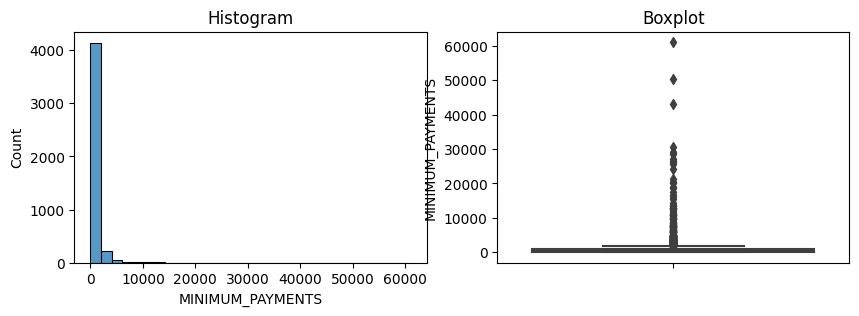

skewness: 12.56971436375272
the distribution is skewed


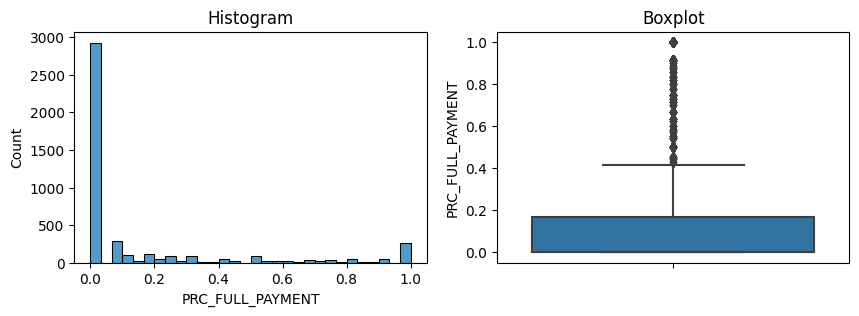

skewness: 1.9116495684046537
the distribution is skewed


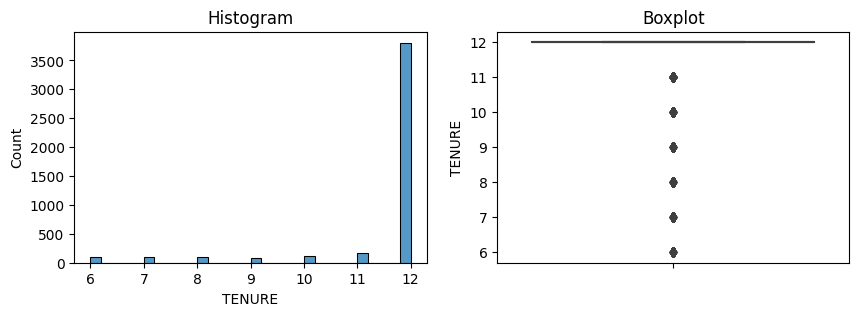

skewness: -2.9328221430257617
the distribution is skewed


In [18]:
# showing histogram dan boxplot in dataset
for i in df:
    hist_boxplot(df, i)

In [19]:
# kolom yang akan dihandling outliersnya
cols = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'ONEOFF_PURCHASES_FREQUENCY',
        'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']


In [20]:
# membuat capper dengan menggunakan median imputation
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=cols)

# fit dan transform data
df_handle = windsoriser.fit_transform(df)

selanjutnya yaitu melihat distribusi data setelah melakukan capping untuk handling outlier 

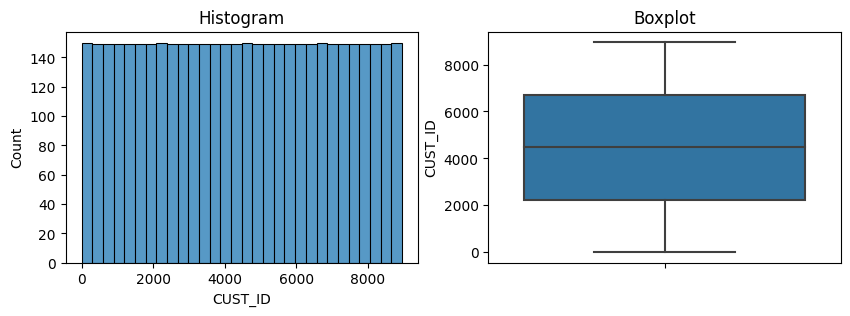

skewness: 0.0
the distribution is normal


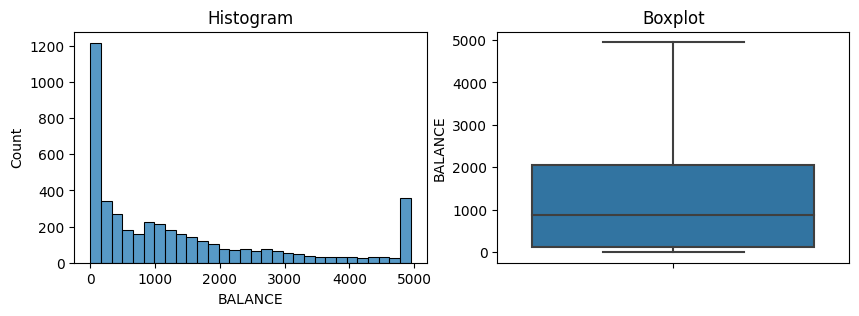

skewness: 1.1657259121091936
the distribution is skewed


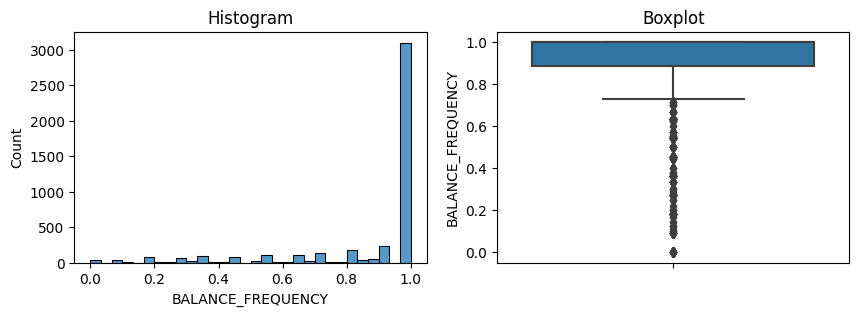

skewness: -2.020309250153954
the distribution is skewed


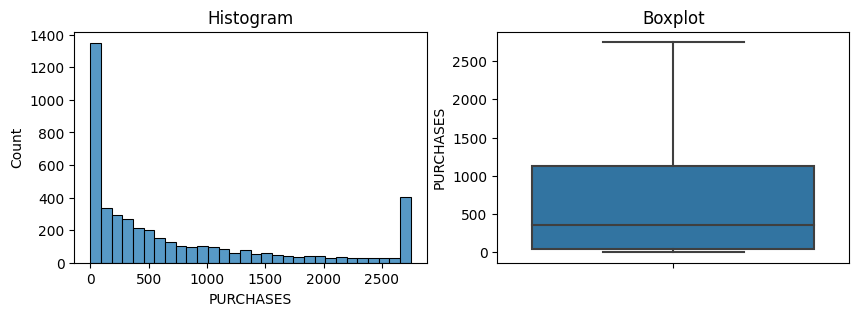

skewness: 1.2075019477372246
the distribution is skewed


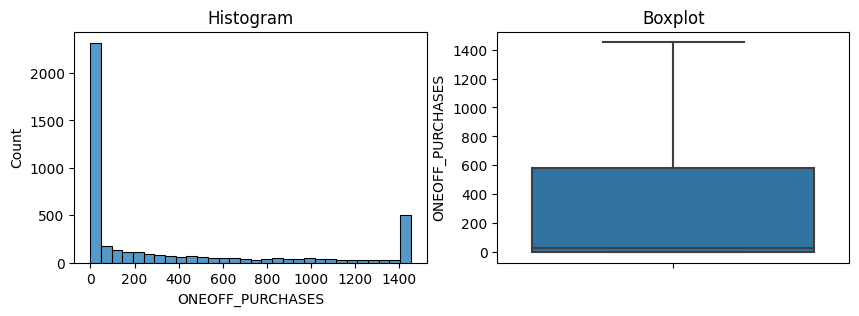

skewness: 1.2283840370656014
the distribution is skewed


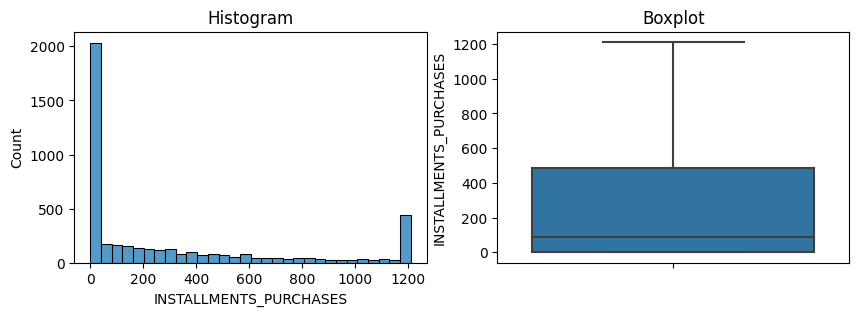

skewness: 1.2283331745312547
the distribution is skewed


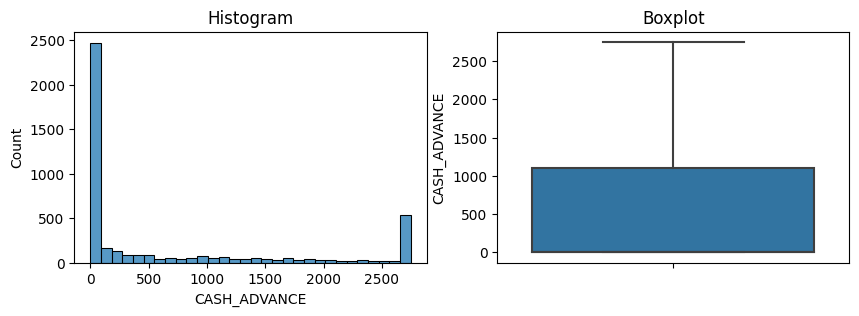

skewness: 1.264300755225504
the distribution is skewed


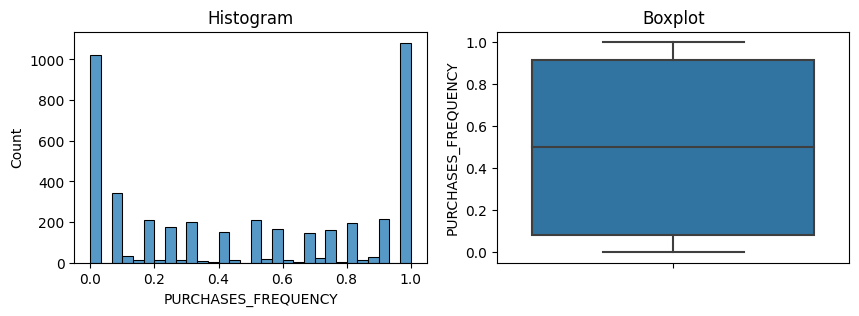

skewness: 0.06159754482450298
the distribution is normal


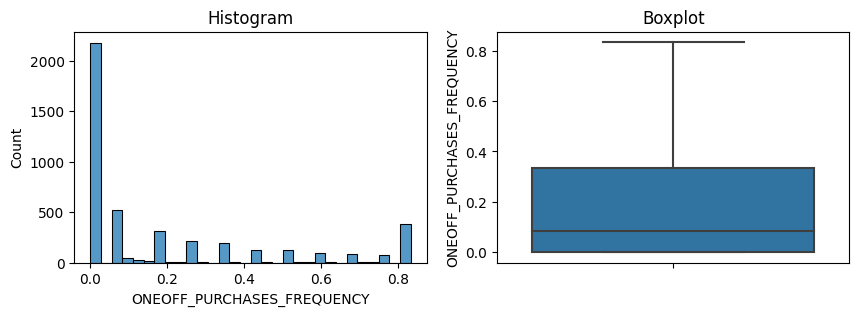

skewness: 1.3412151499200158
the distribution is skewed


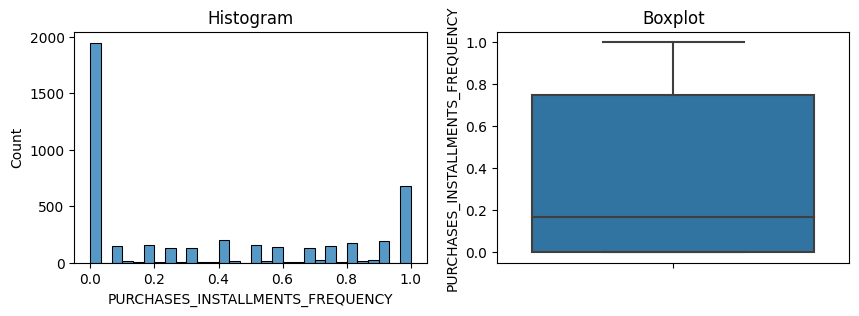

skewness: 0.5102876658863782
the distribution is skewed


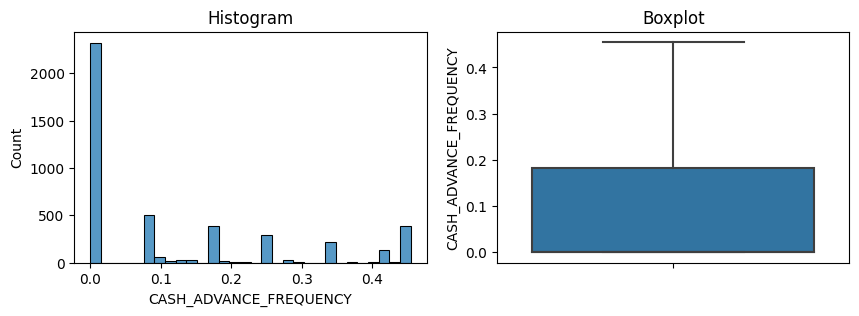

skewness: 1.077506221596407
the distribution is skewed


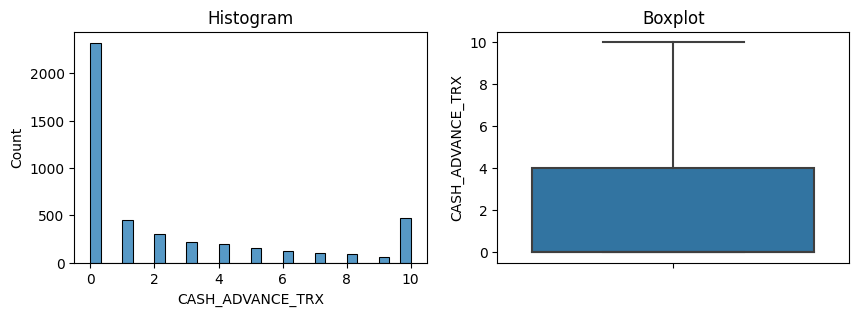

skewness: 1.2872746005964386
the distribution is skewed


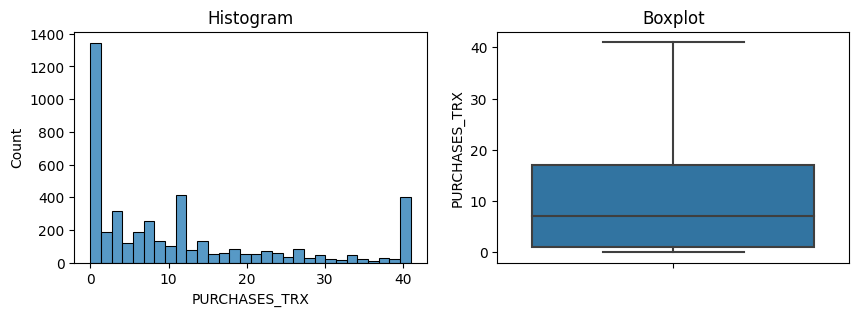

skewness: 1.1456681579218924
the distribution is skewed


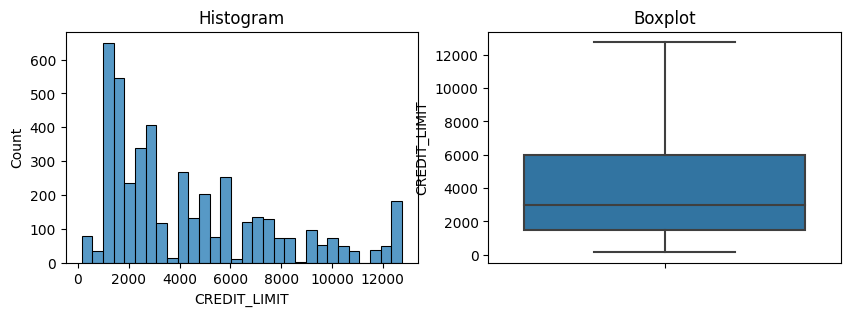

skewness: 1.0071527638070132
the distribution is skewed


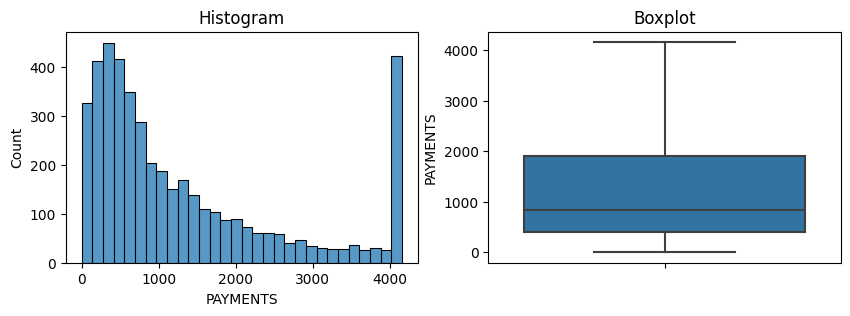

skewness: 1.1418651301663274
the distribution is skewed


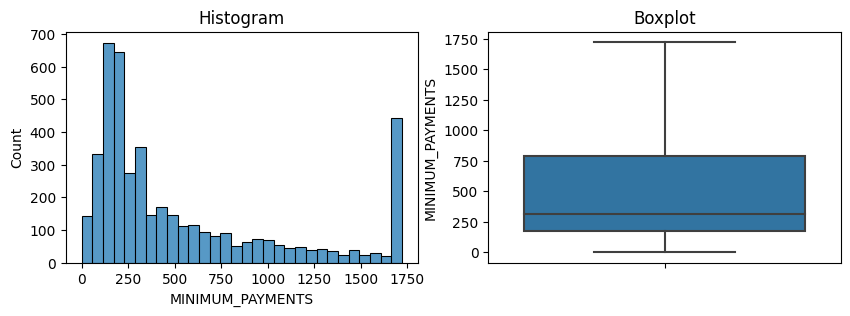

skewness: 1.1810660472473107
the distribution is skewed


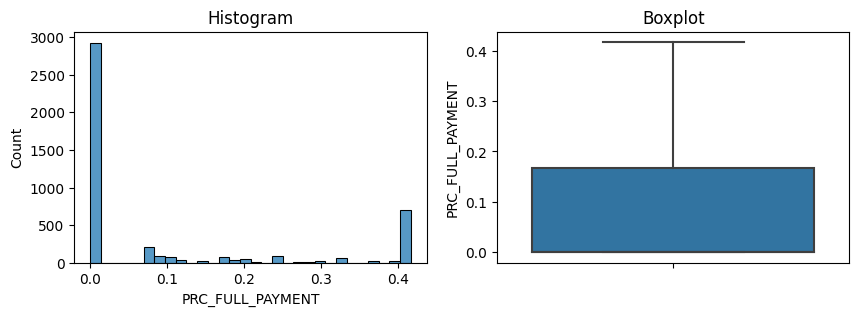

skewness: 1.2721768710035686
the distribution is skewed


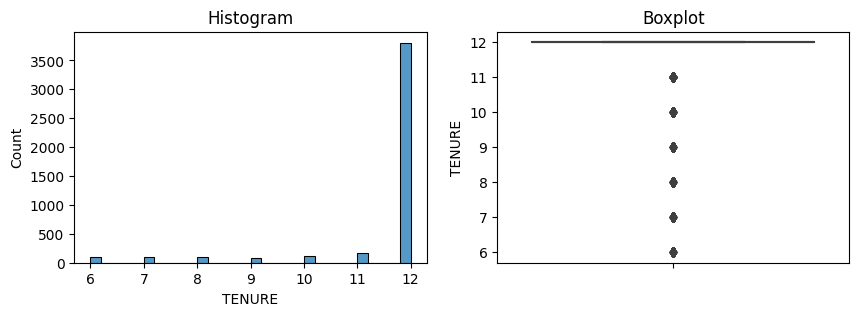

skewness: -2.9328221430257617
the distribution is skewed


In [21]:
# showing histogram dan boxplot setelah handling outlier
for i in df_handle:
    hist_boxplot(df_handle, i)

## 5.4 Feature Selection

In [22]:
# drop kolom CUST_ID
df_handle.drop(['CUST_ID'], axis=1, inplace=True)

statement : kolom `CUST_ID` di drop karena setiap customer id memiliki nilai yang berbeda-beda, apabila ada customer yang memiliki id tertentu maka tidak akan ada pengaruhnya. Oleh karena itu kolom `CUST_ID` ini akan di drop karena jika nilainya berbeda tidak akan berpengaruh.

## 5.5 Feature Scaling

karena mayoritas datanya berdistribusi skewed, maka saya akan menggunakan metode `MinMaxScaler` dalam menghandling feature scaling

In [23]:
# definisikan scaling
scaler = MinMaxScaler()

# fit dan transform data scaling
df_scaled = scaler.fit_transform(df_handle)

## 5.6 Check Multicollinearity

In [24]:
# Extracting the numerical columns
data = df[columns]
cols = [cname for cname in data.columns if data[cname].dtype in ['int64', 'float64']]

# Vif dataframe
vif_data = pd.DataFrame()
vif_data['Feature'] = data.columns

# mengkalkulasikan nilai VIF untuk setiap fitur
vif_data['VIF']= [variance_inflation_factor(data.values, i) 
for i in range(len(data.columns))]

# Print VIF
print(vif_data)

        Feature       VIF
0       BALANCE  1.797758
1     PURCHASES  2.477718
2  CASH_ADVANCE  2.491009
3      PAYMENTS  3.482636


statement : VIF pada feature diatas < 10, maka artinya tidak terjadi multikolinieritas dalam model. Sehingga dapat disimpulkan bahwa model regresi berikut baik, karena tidak ada multikolinieritas.

# Conceptual Problem

1. Apakah yang dimaksud dengan inertia pada algoritma K-Means ?
    
    Inersia merupakan pengukuran seberapa baik kumpulan data dikelompokkan oleh K-Means. Perhitungannya dengan mengukur jarak antara setiap titik data dan pusat massanya (mengkuadratkan jarak ini, dan menjumlahkan kuadrat ini di satu cluster).

    Model yang baik adalah model yang memiliki inersia yang rendah dan jumlah cluster (K) yang rendah. Namun, ini merupakan tradeoff karena K meningkat, inersia menurun.

    Untuk mencari K optimal gunakan metode Elbow, dengan cara menemukan titik dimana penurunan inersia mulai melambat.

    Surce : `https://www.codecademy.com/learn/machine-learning/modules/dspath-clustering/cheatsheet`

2. Jelaskan yang dimaksud dengan Elbow Method (alasan penggunaan, cara penggunaan, kelemahan/kelebihan, dll) !

    Metode Elbow merupakan suatu metode yang digunakan untuk menghasilkan informasi dalam menentukan jumlah cluseter terbaik dengan cara melihat persentase hasil perbandingan antara jumlah cluster yang akan membentuk siku pada suatu titik. Pada metode elbow nilai cluster terbaik yang akan diambil dari nilai Sum of Square Error (SSE) yang mengalami penurunan yang signifikan dan berbentuk siku.

    Alasan menggunakan Elbow Method karena grafiknya include dengan score. Kelebihannya yaitu hasil atau siku pada titik tidak menentukan secara visual, sedangkan kekurangannya yaitu jika disandingkan dengan shilutte terkadang distribusi datanya tidak bagus.   

    Source : `https://jurnal.uns.ac.id/itsmart/article/viewFile/11296/11108#:~:text=Metode%20Elbow%20merupakan%20suatu%20metode,pada%20suatu%20titik%20%5B4%5D.`

3. Jelaskan perbedaan masing-masing algoritma clustering yang anda gunakan dalam kasus ini !